In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("pima-indians-diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

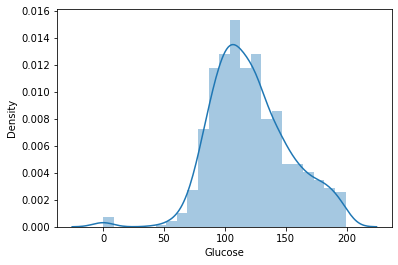

In [7]:
sns.distplot(df["Glucose"])

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

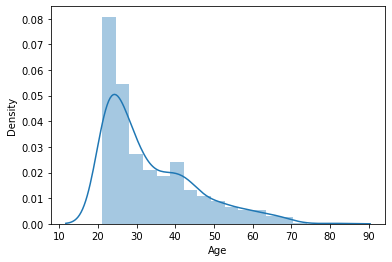

In [9]:
sns.distplot(df["Age"])

In [10]:
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [11]:
df.shape

(768, 9)

In [12]:
df["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [13]:
df["Pregnancies"].nunique()

17

In [14]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [15]:
df["Pregnancies"] = df["Pregnancies"].astype("category")
df["Outcome"] = df["Outcome"].astype("category")

In [16]:
df["Age"] = df["Age"].apply(np.log1p)

In [17]:
df["Insulin"] = df["Insulin"].apply(np.log1p)

In [18]:
df_num = df.select_dtypes(include =["float64", "int64"])
df_cat = df.select_dtypes(exclude =["float64", "int64"])

In [19]:
df_cat = df_cat.drop("Outcome",axis=1)

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [21]:
mn = MinMaxScaler()
df_num_sc = mn.fit_transform(df_num)

In [22]:
df_num_df = pd.DataFrame(df_num_sc, index = df_num.index, columns=df_num.columns)

In [23]:
df_cat_dum = pd.get_dummies(df_cat)

In [24]:
df_final = pd.concat([df_num_df, df_cat_dum],axis=1)

In [25]:
df_final.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_0,Pregnancies_1,Pregnancies_2,...,Pregnancies_7,Pregnancies_8,Pregnancies_9,Pregnancies_10,Pregnancies_11,Pregnancies_12,Pregnancies_13,Pregnancies_14,Pregnancies_15,Pregnancies_17
0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.639050,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.284791,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.308180,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.447236,0.540984,0.232323,0.675479,0.418778,0.038002,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.688442,0.327869,0.353535,0.760921,0.642325,0.943638,0.330870,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
x = df_final
y = df["Outcome"]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state = 10)

In [29]:
from sklearn.ensemble import AdaBoostClassifier

In [30]:
ad = AdaBoostClassifier()
ad.fit(x_train, y_train)

AdaBoostClassifier()

In [31]:
pred = ad.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
accuracy_score(y_test, pred)

0.7012987012987013

In [34]:
accuracy_score(y_train, ad.predict(x_train))

0.8422575976845152

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 100)

In [36]:
ad = AdaBoostClassifier()
ad.fit(x_train, y_train)

AdaBoostClassifier()

In [37]:
pred = ad.predict(x_test)

In [38]:
accuracy_score(y_test, pred)

0.7077922077922078

In [39]:
accuracy_score(y_train, ad.predict(x_train))

0.8371335504885994

In [40]:
ad = AdaBoostClassifier(n_estimators=500)
ad.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=500)

In [41]:
pred = ad.predict(x_test)

In [42]:
accuracy_score(y_test, pred)

0.6818181818181818

In [43]:
accuracy_score(y_train, ad.predict(x_train))

0.9381107491856677

In [44]:
from sklearn.model_selection import cross_validate

In [45]:
ad_cv = cross_validate(ad, x,y, cv = 10, return_train_score=True)

In [46]:
ad_test = np.average(ad_cv["test_score"])

In [47]:
ad_train = np.average(ad_cv["train_score"])

In [48]:
ad_test

0.7357313738892686

In [49]:
ad_train

0.9134840601289911